## The math behind the photo enhancements.

The idea here is to _"reverse engineer"_ a GIMP filter, used to give a photo a certain "vintage" look. 

First let's import the necessary tools: skimage.io, matplotlib.pyplot and NumPy:

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


Let's load an image first. 


In [125]:
image = io.imread('./my_notebooks/riogrande.jpg') #load an image as Numpy array

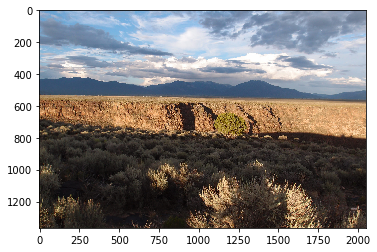

In [3]:
plt.imshow(image) # let's see what it is


Let's see how the three color channels look in this particular photo. In order to do that, we can write
a function that will take the image and display histograms of all three channels: red, green and blue.


In [4]:
def channel_splitter(image):
    '''fast numpy-based version, takes an image imported as numpy array and returns a graph 
    with three channels histograms'''
    xaxis = np.arange(256) # create the x-axis between 0 and 255
    fig, ax = plt.subplots() # initiate plots
    for number, color in enumerate(['red', 'green', 'blue']): 
        # creates pairs of channel numbers (0-2) and color names
        freqcount, _ = np.histogram(image[:,:,number], bins = np.arange(257)) 
        # gets the counts for each bin; must be one more bin as np.histogram returns bin edges
        # that is pixels with value 255 are in the bin 255-256
        ax.fill_between(xaxis, 0, freqcount, facecolor = color, alpha = 0.3) 
        #makes a graph with the correct color for each channel, transparency set to 30%
    plt.show()
        

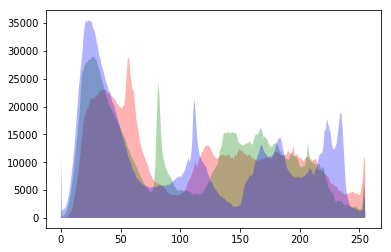

In [5]:
channel_splitter(image) #use the channel_splitter function on the image we loaded

We can see that this image has a lot of shadows, but they're not pure greys/blacks, they are shifted towards blue and green. There are also some peaks of reds, greens and blues here and there. 

Let's load a second image, a processed version of the original.

In [126]:
image_mod = io.imread('./my_notebooks/riogrande_agfa.jpg') #load the second image, processed with a filter

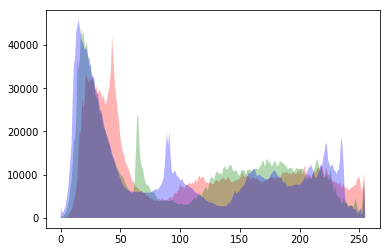

In [7]:
channel_splitter(image_mod)


Without looking at the processed version we can tell that something must have changed here. 
The peaks on the left are taller and sharper: it would indicate deeper shadows with more abrupt tonal transitions. The shadows are also greener. 

Let's look at each channel, comparing the two images. To do this, let's write another function.


In [8]:
def channel_cross_analysis(image1, image2):
    '''takes each color channel from both images and shows two overlaid histograms'''
    xaxis = np.arange(256) # create the x-axis between 0 and 255
    for number, color in enumerate(['red', 'green', 'blue']): 
            fig, ax = plt.subplots() # initiate plots    
            freqcount1, _ = np.histogram(image1[:,:,number], bins = np.arange(257))
            freqcount2, _ = np.histogram(image2[:,:,number], bins = np.arange(257))
            ax.fill_between(xaxis, 0, freqcount1, facecolor = 'gray', alpha = 0.4) # gray is the original
            ax.fill_between(xaxis, 0, freqcount2, facecolor = (color), alpha = 0.4) 
            plt.title("{} channel".format(color))
            plt.show()
        


This time we're using gray for the original image's channel and red/green/blue for the modified image.


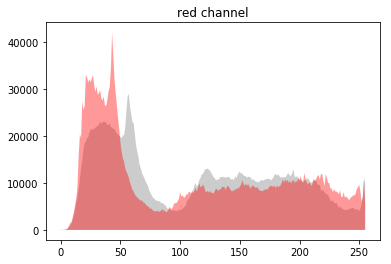

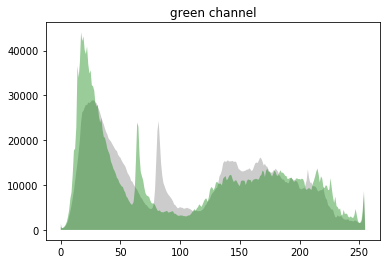

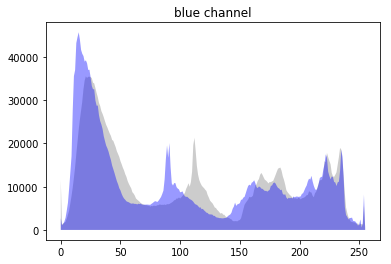

In [9]:
channel_cross_analysis(image, image_mod) #let's see how the three channels differ between the two images


Now we can see the differences more clearly: there's a boost in all three channels on the left (the shadows), with much sharper peaks. In the darker midtones there's a visible shift to the left in both green and blue channel (the peaks), a similar shift occurs also in the red channel in the shadows. These are rather subtle changes, but you can clearly see that the two images are different in tone.




(-0.5, 2047.5, 1364.5, -0.5)

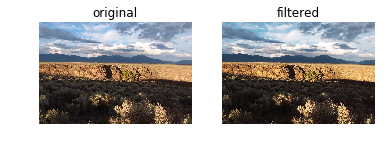

In [10]:
f, axarr = plt.subplots(1, 2)

axarr[0].imshow(image)
axarr[0].set_title("original")
axarr[0].axis('off')

axarr[1].imshow(image_mod)
axarr[1].set_title("filtered")
axarr[1].axis('off')



The next step will be finding the correlations between the channels of the two images... __stay tuned__!


In [11]:
# note to self: need to find a way to mask what's not a peak, e.g. leaving only the peak channel values +/- some range.
# E.g. if there's a peak at 200, mask everything that's not between 190 and 210, etc. 

In order to compare 

In [132]:
def channel_corr(image1, image2):
    '''returns charts showing the correlation between the same channels of two images'''
    for number, color in enumerate(['red', 'green', 'blue']):
        fig, ax = plt.subplots() # initiate plots    
        '''ch_im_1 = np.ravel(image1[:,:,number]) #converts the 2D array into 1D
        ch_im_2 = np.ravel(image2[:,:,number])'''
        ch_im_1 = image1[:,:,number]
        ch_im_2 = image2[:,:,number]
        plt.scatter(ch_im_1,ch_im_2, c = color, alpha = 0.3)
        plt.set_xlim = (0,255)
        plt.xlabel("original image")
        plt.set_ylim = (0,255)
        plt.ylabel("modified image")
        plt.title("{} channel".format(color))
        plt.show()

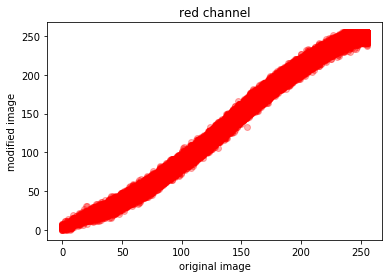

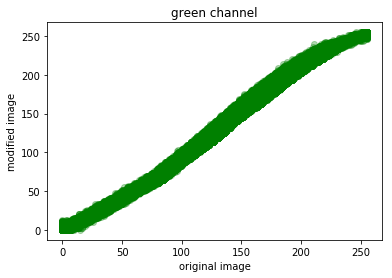

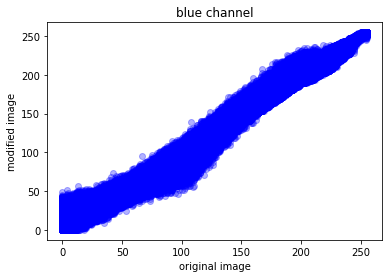

In [133]:
channel_corr(image, image_mod)

In [97]:
bins_16 = [(i*16)-1 for i in range(1,17)]

In [98]:
bins_16.insert(0,0)

In [99]:
bins_8 = [(i*32)-1 for i in range(1,9)]

In [100]:
bins_8.insert(0,0)

In [101]:
bins_8

[0, 31, 63, 95, 127, 159, 191, 223, 255]

In [102]:
bchan = image[:,:,2]

In [103]:
b_count, b_bin_edges = np.histogram(bchan, bins_8)

In [25]:
r_count, r_bin_edges = np.histogram(rchan, bins)

In [116]:
b_dict = {b_count[k]:(b_bin_edges[k], b_bin_edges[k+1]) for k in range (0,8)}

In [114]:
statistics.mean([0, 31])

15.5

In [119]:
for key in b_dict.keys():
    b_dict[key] = statistics.mean([b_dict[key][0], b_dict[key][1]])


In [120]:
b_dict

{634004: 15,
 593678: 47,
 190609: 79,
 326332: 111,
 125890: 143,
 363832: 175,
 287652: 207,
 273523: 239}

In [95]:
r_dict = {r_count[k]:(r_bin_edges[k], r_bin_edges[k+1]) for k in range (0,16)}

In [96]:
r_dict

{26136: (0, 15),
 291448: (15, 31),
 357768: (31, 47),
 362882: (47, 63),
 179813: (63, 79),
 84603: (79, 95),
 84197: (95, 111),
 181393: (111, 127),
 178042: (127, 143),
 183296: (143, 159),
 169855: (159, 175),
 181493: (175, 191),
 179546: (191, 207),
 153608: (207, 223),
 90291: (223, 239),
 91149: (239, 255)}

In [48]:
r_dict_2 = {key:((r_dict[key][0] + r_dict[key][1])/2) for key in r_dict.keys()}

In [49]:
r_dict_2

{26136: 7.5,
 291448: 23.0,
 357768: 39.0,
 362882: 55.0,
 179813: 71.0,
 84603: 87.0,
 84197: 103.0,
 181393: 119.0,
 178042: 135.0,
 183296: 151.0,
 169855: 167.0,
 181493: 183.0,
 179546: 199.0,
 153608: 215.0,
 90291: 231.0,
 91149: 247.0}

<BarContainer object of 16 artists>

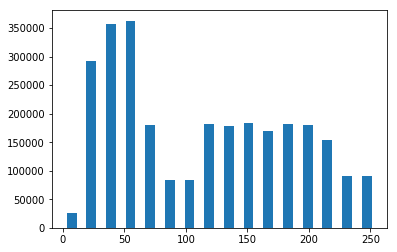

In [59]:
plt.bar(r_dict_2.values(), r_dict_2.keys(), width = 8)

In [83]:
r_dict.keys()

dict_keys([26136, 291448, 357768, 362882, 179813, 84603, 84197, 181393, 178042, 183296, 169855, 181493, 179546, 153608, 90291, 91149])

In [85]:
max(r_dict.keys())

362882

In [86]:
min(r_dict.keys())

26136

In [87]:
import math

In [88]:
import statistics

In [89]:
statistics.mean(r_dict.keys())

174720

In [90]:
statistics.median(r_dict.keys())

178794.0

In [29]:
max(r_dict.keys())

362882

In [67]:
rchan[rchan < 47] = 0

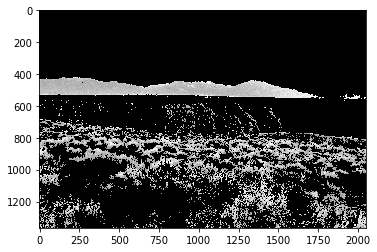

In [68]:
plt.imshow(rchan, cmap = 'gray')

In [76]:
rchan_mask = np.ma.masked_where(rchan != 0, rchan)

In [77]:
rchan_mask

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, 0, 0, ..., --, --, --],
        [--, 0, 0, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=uint8)

In [78]:
gchan = image[:,:,1]
bchan = image[:,:,2]

In [79]:
bchan = bchan * rchan_mask.mask

In [80]:
gchan = gchan * rchan_mask.mask

In [81]:
image_filtered = np.stack([rchan, gchan, bchan], axis = 2)

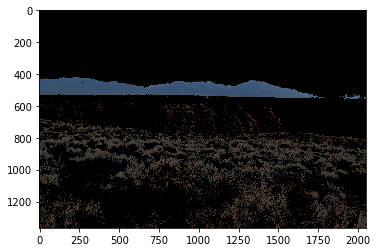

In [82]:
plt.imshow(image_filtered)

In [134]:
image[:,:,0].shape

(1365, 2048)

In [137]:
def noise_gen(v_res, h_res):
    red = np.array([[np.random.randint(0,256) for h in range(0, h_res)] for v in range (0,v_res)])
    green = np.array([[np.random.randint(0,256) for h in range(0, h_res)] for v in range (0,v_res)])
    blue= np.array([[np.random.randint(0,256) for h in range(0, h_res)] for v in range (0,v_res)])
    noise = np.stack([red, green, blue], axis = 2)
    return noise

In [138]:
test_noise = noise_gen(1365, 2048)

In [139]:
test_noise.shape

(1365, 2048, 3)

128 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


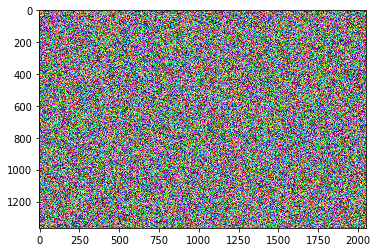

In [142]:
%timeit plt.imshow(test_noise)

In [146]:
def noise_gen_v2(v_res, h_res):
    red = np.random.randint(0,256, size = (v_res, h_res))
    green = np.random.randint(0,256, size = (v_res, h_res))
    blue = np.random.randint(0,256, size = (v_res, h_res))
    noise = np.stack([red, green, blue], axis = 2)
    return noise

In [147]:
%timeit noise_gen_v2(1365, 2048)

150 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [150]:
%timeit noise_gen(1000,1000)

11.2 s ± 869 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
%timeit noise_gen_v2(1000,1000)

50.9 ms ± 603 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [144]:
np.random.randint(9, size = (10,10))

array([[3, 4, 7, 4, 6, 6, 2, 7, 6, 2],
       [3, 3, 3, 7, 1, 8, 1, 2, 5, 1],
       [1, 8, 7, 8, 1, 0, 6, 5, 3, 1],
       [4, 6, 6, 0, 7, 4, 3, 2, 0, 2],
       [1, 5, 7, 6, 3, 2, 4, 8, 8, 2],
       [0, 2, 1, 7, 2, 8, 1, 2, 8, 3],
       [0, 1, 2, 3, 1, 2, 5, 3, 3, 8],
       [1, 6, 8, 1, 1, 6, 3, 3, 6, 8],
       [0, 8, 1, 6, 7, 0, 2, 6, 8, 6],
       [1, 3, 6, 2, 1, 8, 8, 5, 3, 3]])

In [145]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype='l')

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

Parameters
----------
low : int
    Lowest (signed) integer to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
dtype : dtype, optional
    Desired dtype of the result. All dtypes are determined by their
    name, i.e., 'in

In [151]:
def noise_gen_v3(v_res, h_res):
    return np.random.randint(0,256, size = (v_res, h_res, 3))

In [152]:
%timeit noise_gen_v3(1365, 2048)

90.4 ms ± 4.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [182]:
def noise_gen_v4(v_res, h_res):
    return np.random.randint(0,256, size = (v_res, h_res, 3), dtype='uint8')

#the fastest version!

In [183]:
%timeit noise_gen_v4(1365, 2048)

30.8 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [184]:
test_noise = noise_gen_v4(1365, 2048)

In [185]:
io.imsave('test_noise.jpg', test_noise)

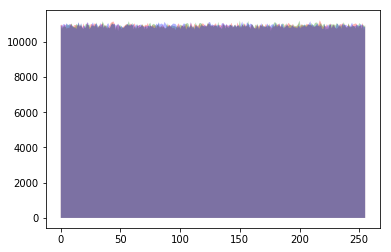

In [186]:
channel_splitter(test_noise)

In [188]:
test_noise_mod = io.imread('./test_noise_mod.jpg')

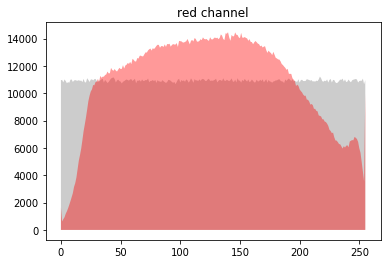

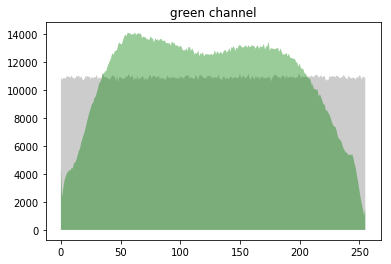

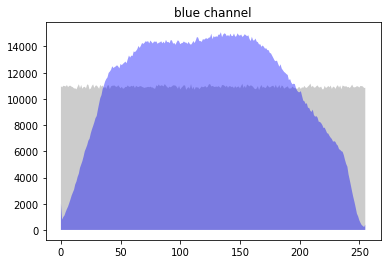

In [189]:
channel_cross_analysis(test_noise, test_noise_mod)

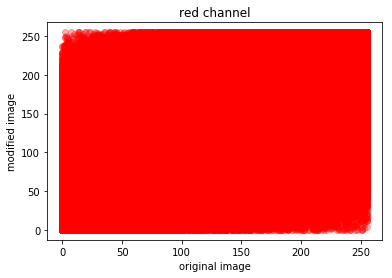

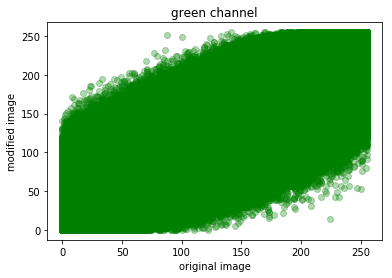

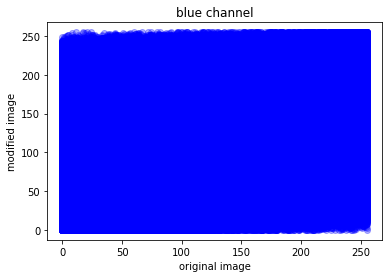

In [190]:
channel_corr(test_noise, test_noise_mod)